In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
# Ejercicio 12

In [4]:
A = np.array([[1000, 999], [999, 998]], dtype=float)
b = np.array([1999, 1997], dtype=float)

print('A =')
print(A)
print('b =', b)

A =
[[1000.  999.]
 [ 999.  998.]]
b = [1999. 1997.]


In [5]:
x = np.linalg.solve(A, b)
print('x =', x)

x = [1. 1.]


In [6]:
x_hat = np.array([20.97, -18.99])
print('x_hat =', x_hat)

x_hat = [ 20.97 -18.99]


In [7]:
# Norma 1

# Número de condición
print('k(A)_1 =', np.linalg.cond(A, p=1))

# Error relativo
print('delta(x)_1 = ', np.linalg.norm(x_hat - x, ord=1) / np.linalg.norm(x, ord=1))

# Residuo
print('||b - A @ x_hat||_1 =', np.linalg.norm(b - A @ x_hat, ord=1))

k(A)_1 = 3996001.0000035455
delta(x)_1 =  19.979999999999116
||b - A @ x_hat||_1 = 0.01999999999884494


In [8]:
# Norma 2

# Número de condición
print('k(A)_2 =', np.linalg.cond(A, p=2))

# Error relativo
print('delta(x)_2 = ', np.linalg.norm(x_hat - x, ord=2) / np.linalg.norm(x, ord=2))

# Residuo
print('||b - A @ x_hat||_2 =', np.linalg.norm(b - A @ x_hat, ord=2))

k(A)_2 = 3992005.999620532
delta(x)_2 =  19.980002502501463
||b - A @ x_hat||_2 = 0.014142135622914201


In [9]:
# Norma infinito

# Número de condición
print('k(A)_inf =', np.linalg.cond(A, p=np.inf))

# Error relativo
print('delta(x)_inf = ', np.linalg.norm(x_hat - x, ord=np.inf) / np.linalg.norm(x, ord=np.inf))

# Residuo
print('||b - A @ x_hat||_inf =', np.linalg.norm(b - A @ x_hat, ord=np.inf))

k(A)_inf = 3996001.0000035455
delta(x)_inf =  19.98999999998137
||b - A @ x_hat||_inf = 0.010000000000445652


**Observación:** En un sistema mal condicionado casi no hay relación entre el tamaño del residuo y la exactitud de la solución.

In [10]:
# Ejercicio 13

In [11]:
A = np.array([[375, 374], [752, 750]], dtype=float)
print('A =')
print(A)

A =
[[375. 374.]
 [752. 750.]]


In [12]:
A_inv = np.linalg.inv(A)
print('A_inv =')
print(A_inv)

A_inv =
[[ 375.  -187. ]
 [-376.   187.5]]


In [13]:
cond = np.linalg.cond(A, p=np.inf)
print('k(A)_inf =', cond)

k(A)_inf = 846377.0000087388


Buscamos $b$, $\theta$, $x$ y $\zeta$ tales que $Ax = b$, $A(x + \zeta) = b + \theta$, $\frac{|| \theta ||_{\infty}}{|| b ||_{\infty}}$ sea pequeño y $\frac{|| \zeta ||_{\infty}}{|| x ||_{\infty}}$ sea grande.

In [14]:
b = np.array([74.9, 150.2])
theta = np.array([0.1, 0.1])
print('b         =', b)
print('b + theta =', b + theta)
print('||theta||/||b|| =', np.linalg.norm(theta, ord=np.inf) /  np.linalg.norm(b, ord=np.inf))

b         = [ 74.9 150.2]
b + theta = [ 75.  150.3]
||theta||/||b|| = 0.0006657789613848203


In [15]:
x = np.linalg.solve(A, b)
zeta = np.linalg.solve(A, b + theta) - x
print('x        =', x)
print('x + zeta =', x + zeta)
print('||zeta||/||x|| =', np.linalg.norm(zeta, ord=np.inf) /  np.linalg.norm(x, ord=np.inf))

x        = [0.1 0.1]
x + zeta = [ 18.9  -18.75]
||zeta||/||x|| = 188.49999999196382


Buscamos $b$, $\theta$, $x$ y $\zeta$ tales que $Ax = b$, $A(x + \zeta) = b + \theta$, $\frac{|| \zeta ||_{\infty}}{|| x ||_{\infty}}$ sea pequeño y  $\frac{|| \theta ||_{\infty}}{|| b ||_{\infty}}$ sea grande.

In [16]:
x = np.array([5.0, -5.0])
zeta = np.array([0.9, 0.9])
print('x     =', x)
print('x + zeta =', x + zeta)
print('||zeta||/||x|| =', np.linalg.norm(zeta, ord=np.inf) /  np.linalg.norm(x, ord=np.inf))

x     = [ 5. -5.]
x + zeta = [ 5.9 -4.1]
||zeta||/||x|| = 0.18


In [17]:
b = A @ x
theta = A @ (x + zeta)
print('b         =', b)
print('b + theta =', b + theta)
print('||theta||/||b|| =', np.linalg.norm(theta, ord=np.inf) /  np.linalg.norm(b, ord=np.inf))

b         = [ 5. 10.]
b + theta = [ 684.1 1371.8]
||theta||/||b|| = 136.18000000000004


In [18]:
# Ejercicio 14

In [19]:
A1 = lambda epsilon: np.array([[1 , 1-epsilon], [0, 1]], dtype=float)
A2 = lambda epsilon: np.array([[1 / epsilon, 0], [0, epsilon]], dtype=float)

In [20]:
def plot_matrix(A):

    det = []
    cond = []

    for i in range(100):

        epsilon = np.exp(-i)
     
        det.append(np.linalg.det(A(epsilon)))
        cond.append(np.linalg.cond(A(epsilon), p=2))

    plt.plot(det)
    plt.plot(cond)
    plt.legend([r'$det(A(\epsilon))$', r'$\kappa(A(\epsilon))$'], loc='upper left')
    plt.grid(True)
    plt.show()

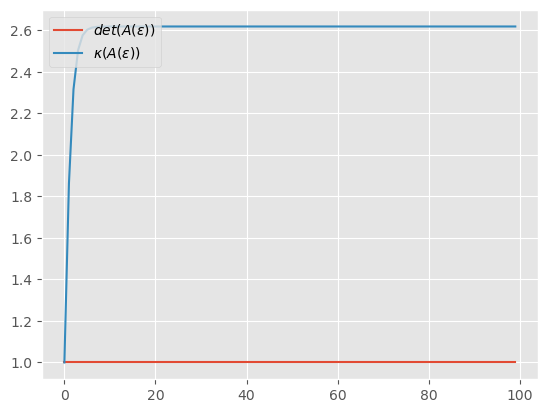

In [21]:
plot_matrix(A1)

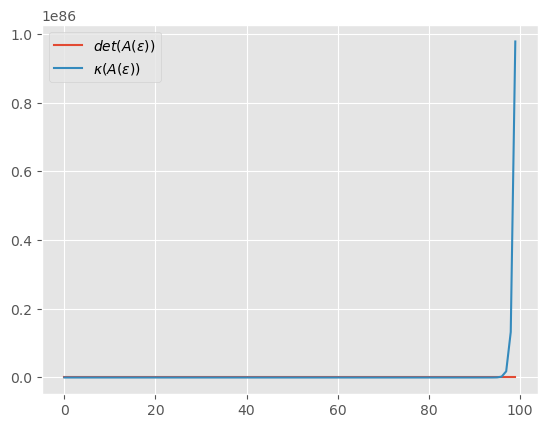

In [22]:
plot_matrix(A2)

In [23]:
def unit_disk(A, epsilon):

    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)

    T = A(epsilon) @ np.vstack([x, y])

    plt.plot(x, y, label='Unit Disk')
    plt.plot(T[0, :], T[1, :], label='T(unit Disk)')
    plt.axis('equal')
    plt.legend()
    plt.show()

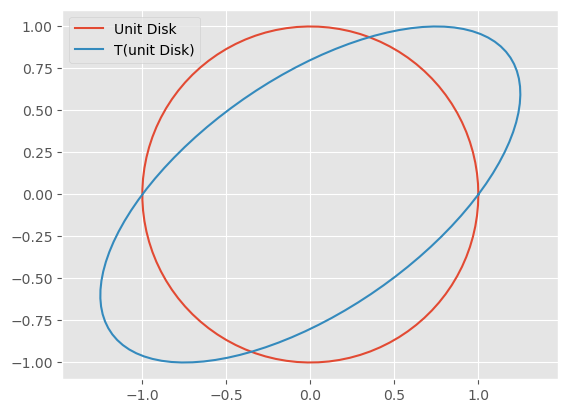

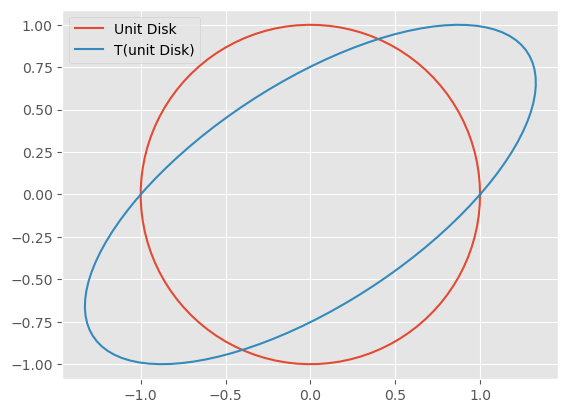

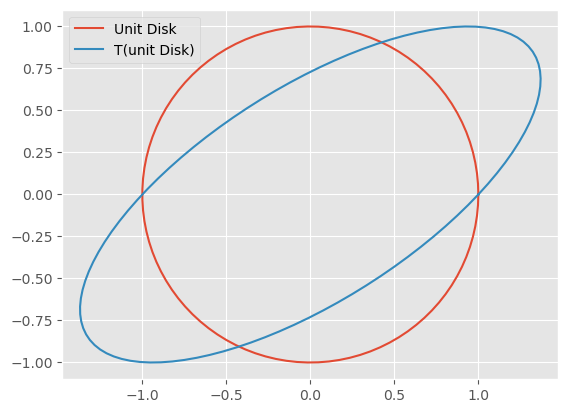

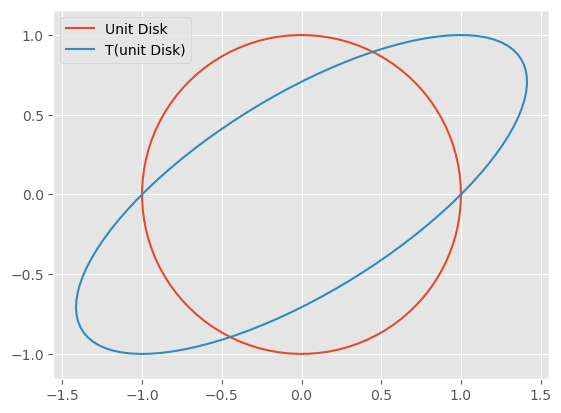

In [24]:
for epsilon in [0.25, 0.125, 0.0625, 1e-5]:
    unit_disk(A1, epsilon)

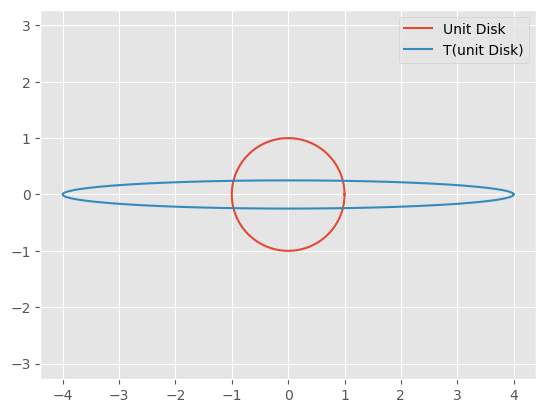

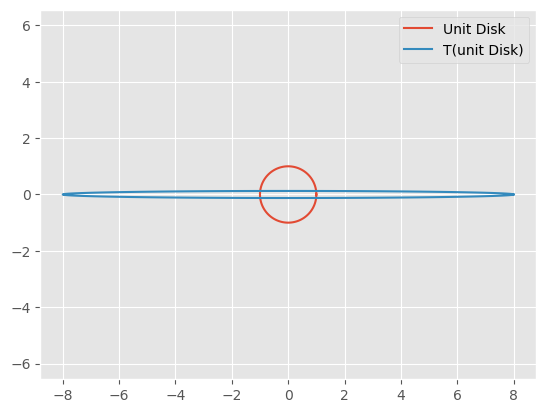

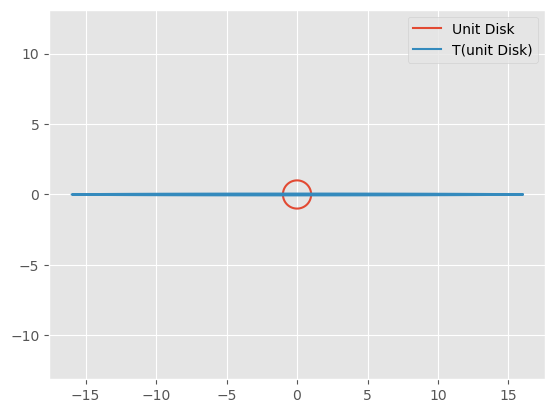

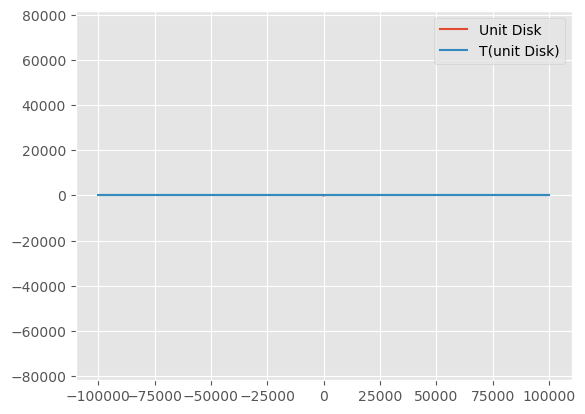

In [25]:
for epsilon in [0.25, 0.125, 0.0625, 1e-5]:
    unit_disk(A2, epsilon)